# Проверка гипотез по увеличению выручки интернет-магазина

## Описание проекта

Аналитика крупного интернет-магазина. Вместе с отделом маркетинга мы подготовили список гипотез для увеличения выручки.
Необходимо приоритизировать гипотезы, запустить A/B-тест и проанализировать результаты.

## Описание данных

hypothesis

* Hypothesis — краткое описание гипотезы;
* Reach — охват пользователей по 10-балльной шкале;
* Impact — влияние на пользователей по 10-балльной шкале;
* Confidence — уверенность в гипотезе по 10-балльной шкале;
* Efforts — затраты ресурсов на проверку гипотезы по 10-балльной шкале. Чем больше значение Efforts, тем дороже проверка гипотезы.

orders

* transactionId — идентификатор заказа;
* visitorId — идентификатор пользователя, совершившего заказ;
* date — дата, когда был совершён заказ;
* revenue — выручка заказа;
* group — группа A/B-теста, в которую попал заказ.

visitors

* date — дата;
* group — группа A/B-теста;
* visitors — количество пользователей в указанную дату в указанной группе A/B-теста

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import matplotlib.dates as mdates
import seaborn as sns
from scipy import stats as st
import scipy.stats as stats
from datetime import date, time, timedelta
from tqdm import tqdm
import sys
import warnings
if not sys.warnoptions:
       warnings.simplefilter("ignore")

In [2]:
try:
    hypothesis = pd.read_csv('/datasets/hypothesis.csv')
except :
    hypothesis = pd.read_csv('hypothesis.csv')

# Часть 1. Приоритизация гипотез.

In [3]:
pd.options.display.max_colwidth = 100
hypothesis

,Hypothesis,Reach,Impact,Confidence,Efforts
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средни...",8,3,7,3
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конве...",5,3,8,3
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5


Примените фреймворк ICE для приоритизации гипотез. Отсортируйте их по убыванию приоритета.

In [4]:
hypothesis['Ice'] = (hypothesis['Impact']*hypothesis['Confidence'])/ hypothesis['Efforts']
hypothesis['Ice']

0    13.333333
1     2.000000
2     7.000000
3     1.125000
4     1.000000
5     1.333333
6     8.000000
7    11.200000
8    16.200000
Name: Ice, dtype: float64

In [5]:
hypothesis.sort_values(by='Ice', ascending=False)

,Hypothesis,Reach,Impact,Confidence,Efforts,Ice
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5,16.200000
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6,13.333333
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5,11.200000
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конве...",5,3,8,3,8.000000
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средни...",8,3,7,3,7.000000
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10,2.000000
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3,1.333333
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8,1.125000
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1,1.000000


Примените фреймворк RICE для приоритизации гипотез. Отсортируйте их по убыванию приоритета.

In [6]:
hypothesis['Rice_score'] =  (hypothesis['Reach']*hypothesis['Impact']*hypothesis['Confidence'])/ hypothesis['Efforts']

In [7]:
hypothesis.sort_values(by='Rice_score', ascending=False)

,Hypothesis,Reach,Impact,Confidence,Efforts,Ice,Rice_score
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5,11.200000,112.0
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средни...",8,3,7,3,7.000000,56.0
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6,13.333333,40.0
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конве...",5,3,8,3,8.000000,40.0
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5,16.200000,16.2
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8,1.125000,9.0
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10,2.000000,4.0
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3,1.333333,4.0
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1,1.000000,3.0


Укажите, как изменилась приоритизация гипотез при применении RICE вместо ICE. Объясните, почему так произошло.

> При приотизации гипотез методом ICE в лидеры вышли: Запустить акцию, дающую скидку на товар в день,Добавить два новых канала привлечения трафика,Добавить форму подписки на все основные страницы.При приотизации гипотез методом RICE в лидеры вышли:Добавить форму подписки на все основные страницы,Добавить блоки рекомендаций товаров на сайт,Добавить два новых канала привлечения трафика. В целом при приотизации 2 лидера совпали, но так как в RICE еще уччитывает скольких пользователей затронет изменение, то скорее всего данный метод более показательный и стоит учитывать его.

# Часть 2. Анализ A/B-теста

In [8]:
try:
    orders = pd.read_csv('/datasets/orders.csv')
    visitors = pd.read_csv('/datasets/visitors.csv')
except:
    orders = pd.read_csv('orders.csv ')
    visitors = pd.read_csv('visitors.csv')

In [9]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   transactionId  1197 non-null   int64 
 1   visitorId      1197 non-null   int64 
 2   date           1197 non-null   object
 3   revenue        1197 non-null   int64 
 4   group          1197 non-null   object
dtypes: int64(3), object(2)
memory usage: 46.9+ KB


In [10]:
orders.date = pd.to_datetime(orders.date)
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   transactionId  1197 non-null   int64         
 1   visitorId      1197 non-null   int64         
 2   date           1197 non-null   datetime64[ns]
 3   revenue        1197 non-null   int64         
 4   group          1197 non-null   object        
dtypes: datetime64[ns](1), int64(3), object(1)
memory usage: 46.9+ KB


In [11]:
orders.duplicated().sum()

0

In [12]:
visitors.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   date      62 non-null     object
 1   group     62 non-null     object
 2   visitors  62 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 1.6+ KB


In [13]:
visitors.date = pd.to_datetime(visitors.date)
visitors.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   date      62 non-null     datetime64[ns]
 1   group     62 non-null     object        
 2   visitors  62 non-null     int64         
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 1.6+ KB


In [14]:
visitors.duplicated().sum()

0

#### Проверим есть ли пересечение пользователей в группе

In [15]:
len_B = orders.query('group == "B"')['visitorId']
len_A = orders.query('group == "A"')['visitorId']
len(set(len_A)& set(set(len_B)))

58

### Постройте график кумулятивной выручки по группам. Сделайте выводы и предположения.

In [16]:
orders.date.max()

Timestamp('2019-08-31 00:00:00')

In [17]:
orders.date.min()

Timestamp('2019-08-01 00:00:00')

In [18]:
ordersDaily = orders.groupby(['date','group'], as_index=False).agg({'visitorId': pd.Series.nunique, 'revenue': 'sum'})
ordersDaily.columns = ['date', 'group','ordersPerDate', 'revenuePerDate']
ordersDaily

,date,group,ordersPerDate,revenuePerDate
0,2019-08-01,A,20,148579
1,2019-08-01,B,20,101217
2,2019-08-02,A,19,93822
3,2019-08-02,B,23,165531
4,2019-08-03,A,24,112473
...,...,...,...,...
57,2019-08-29,B,20,231130
58,2019-08-30,A,10,86460
59,2019-08-30,B,24,215233
60,2019-08-31,A,12,61833


In [19]:
ordersCummulatives = ordersDaily.apply(
    lambda x: ordersDaily[np.logical_and(ordersDaily['date'] <= x['date'], ordersDaily['group'] == x['group'])]
    .agg({'date': 'max','group':'max', 'ordersPerDate': 'sum', 'revenuePerDate': 'sum'}),
    axis=1,
    ).sort_values(by=['date','group'])


In [20]:
ordersCummulatives = ordersCummulatives.rename(columns={'revenuePerDate':'cum_revenue','ordersPerDate':'cum_order'})
ordersCummulatives.head(5)

,date,group,cum_order,cum_revenue
0,2019-08-01,A,20,148579
1,2019-08-01,B,20,101217
2,2019-08-02,A,39,242401
3,2019-08-02,B,43,266748
4,2019-08-03,A,63,354874


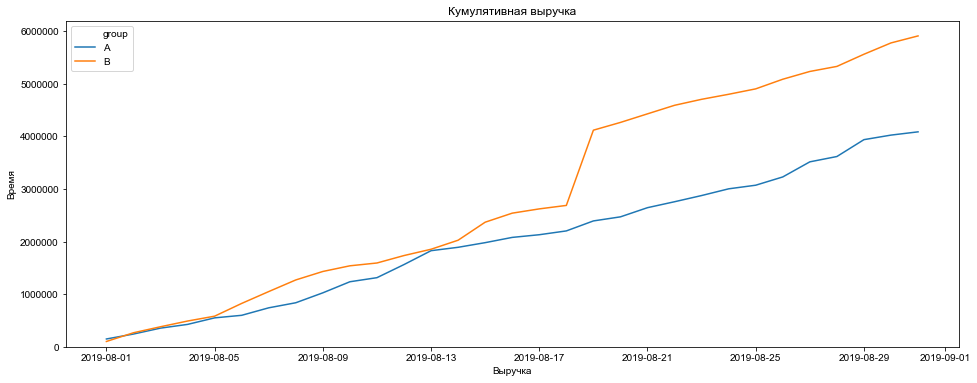

In [21]:
plt.figure(figsize=(16,6))
sns.lineplot(data=ordersCummulatives,x='date',y='cum_revenue',hue='group')
sns.set(style='darkgrid')
plt.title('Кумулятивная выручка')
plt.xlabel('Выручка')
plt.ylabel('Время')
plt.ylim(0)
plt.show()

> Как мы видим на графике выше кумулятивная выручка группы B в период с 17-21 августа сделала значительный скачек. Возможно это выбросы,необходимо этот момент проанализировать(возможно в этот период была запущена акция,одна из гипотез выше). В целом в этих группах выручка равномерно растет.Учитывая одинаковые темпы роста групп, момент скачка на графике скорее всего свидельствует о появлении нескольких дорогих заказов

### Постройте график кумулятивного среднего чека по группам. Сделайте выводы и предположения.

In [22]:
ordersCummulatives['chek'] = ordersCummulatives['cum_revenue']/ordersCummulatives['cum_order']

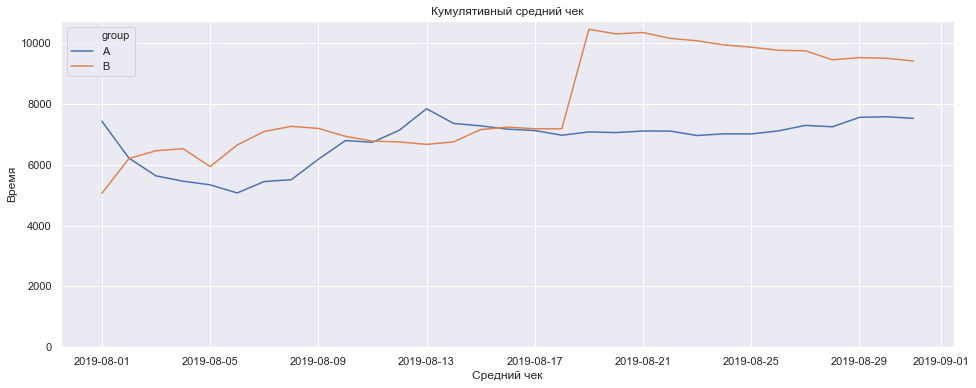

In [23]:
plt.figure(figsize=(16,6))
sns.lineplot(x='date',y='chek',hue='group',data = ordersCummulatives)
sns.set(style='darkgrid')
plt.title('Кумулятивный средний чек')
plt.xlabel('Средний чек')
plt.ylabel('Время')
plt.ylim(0)
plt.show()


> Как видно на данном графие группа В также в период с 17-21 июня имеет значительный скачок, но далее постепенно убывает средний чек.В то время как группа А в этот период не изменилась и вышла на плато, также в этой группе мы видим скачек 8 августа,за котором не последовал рост среднего чека. Значение среднего чека после скачка начинает приходить в норму, но еще далеко от стабилизации. Нужно не забыть учесть этот факт далее

### Постройте график относительного изменения кумулятивного среднего чека группы B к группе A. Сделайте выводы и предположения.

In [24]:
cum_A_chek = ordersCummulatives[ordersCummulatives['group']=='A'][['date', 'chek']]
cum_B_chek = ordersCummulatives[ordersCummulatives['group']=='B'][['date', 'chek']]
cum_chek = cum_A_chek.merge(cum_B_chek, left_on='date', right_on='date', how='left', suffixes=['A', 'B'])
cum_chek.head()

,date,chekA,chekB
0,2019-08-01,7428.950000,5060.850000
1,2019-08-02,6215.410256,6203.441860
2,2019-08-03,5632.920635,6457.559322
3,2019-08-04,5457.679487,6527.560000
4,2019-08-05,5339.000000,5938.724490


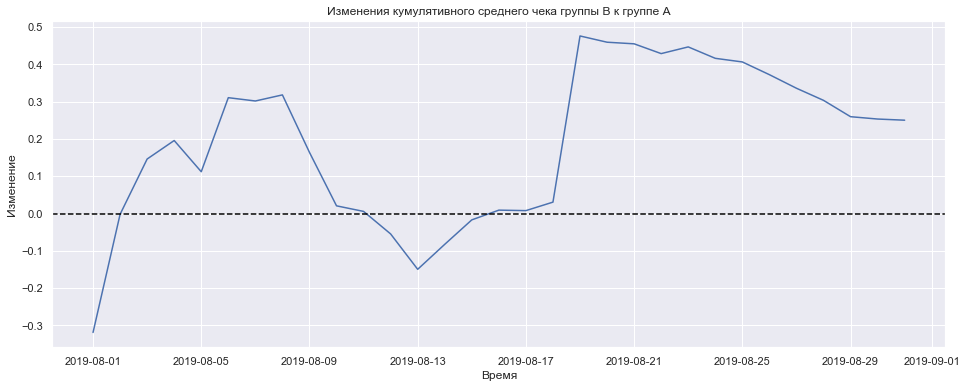

In [25]:
plt.figure(figsize=(16,6))
plt.plot(cum_chek['date'], (cum_chek['chekB'])/(cum_chek['chekA'])-1)
plt.axhline(y=0, color='black', linestyle='--') 
plt.title('Изменения кумулятивного среднего чека группы B к группе A')
plt.xlabel('Время')
plt.ylabel('Изменение')
plt.show()

> По графику выше мы видим, что группа B оказалась в целом лучше,но не стоит принимать поспешных выводов,надо проверить выбросы, которая повлияла на неравномерность графика.

### Постройте график кумулятивной конверсии по группам. Сделайте выводы и предположения.

In [26]:
datesGroups = orders[['date','group']].drop_duplicates()

In [27]:
visitorsAggregated = datesGroups.apply(lambda x: visitors[np.logical_and(visitors['date'] <= x['date'], 
                                       visitors['group'] == x['group'])]
                                       .agg({'date' : 'max', 'group' : 'max', 'visitors' : 'sum'}), axis=1).sort_values(
                                       by=['date','group'])


cumulativeData = ordersCummulatives.merge(visitorsAggregated, left_on=['date', 'group'], right_on=['date', 'group'])
cumulativeData.columns = ['date', 'group', 'orders', 'buyers', 'revenue', 'visitors']

In [28]:
cumulativeData['conversion'] = cumulativeData['orders']/cumulativeData['visitors']
cumulativeData

,date,group,orders,buyers,revenue,visitors,conversion
0,2019-08-01,A,20,148579,7428.950000,719,0.027816
1,2019-08-01,B,20,101217,5060.850000,713,0.028050
2,2019-08-02,A,39,242401,6215.410256,1338,0.029148
3,2019-08-02,B,43,266748,6203.441860,1294,0.033230
4,2019-08-03,A,63,354874,5632.920635,1845,0.034146
...,...,...,...,...,...,...,...
57,2019-08-29,B,584,5559398,9519.517123,17708,0.032979
58,2019-08-30,A,531,4022970,7576.214689,18037,0.029439
59,2019-08-30,B,608,5774631,9497.748355,18198,0.033410
60,2019-08-31,A,543,4084803,7522.657459,18736,0.028982


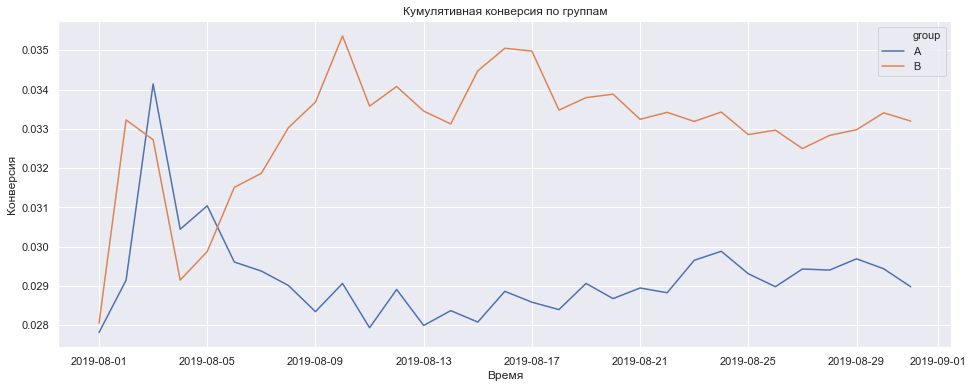

In [29]:
plt.figure(figsize=(16,6))
sns.lineplot(x='date',y='conversion',hue='group',data = cumulativeData)
plt.title('Кумулятивная конверсия по группам')
plt.xlabel('Время')
plt.ylabel('Конверсия')
plt.show()

> Как видно из графика выше,группа А и B в период с 1-5 августа имеют скачок и резкий спад.Но далее группа B значительно выросла в коверсии, когда как в группе А  после резкого спада особых изменеий нет.

### Постройте график относительного изменения кумулятивной конверсии группы B к группе A. Сделайте выводы и предположения.

In [30]:
cum_A_con = cumulativeData[cumulativeData['group']=='A'][['date', 'conversion']]
cum_B_con = cumulativeData[cumulativeData['group']=='B'][['date', 'conversion']]
cum_con = cum_A_con.merge(cum_B_con, left_on='date', right_on='date', how='left', suffixes=['A', 'B'])
cum_con.head()

,date,conversionA,conversionB
0,2019-08-01,0.027816,0.028050
1,2019-08-02,0.029148,0.033230
2,2019-08-03,0.034146,0.032723
3,2019-08-04,0.030445,0.029149
4,2019-08-05,0.031043,0.029878


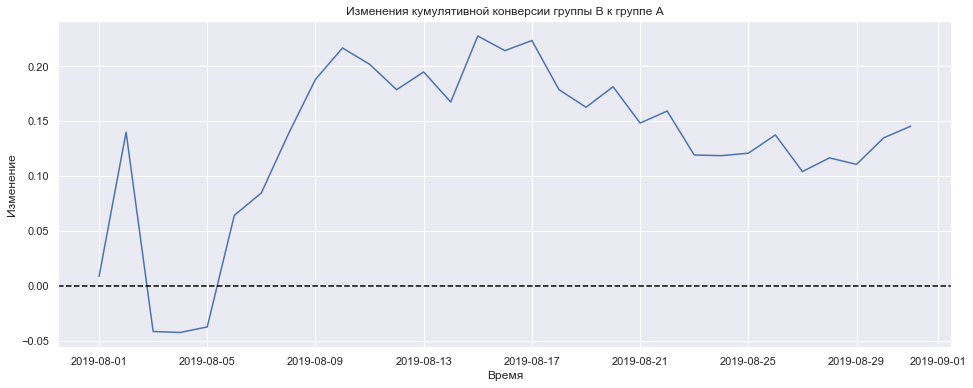

In [31]:
plt.figure(figsize=(16,6))
sns.lineplot(cum_con['date'], (cum_con['conversionB'])/(cum_con['conversionA'])-1)
plt.axhline(y=0, color='black', linestyle='--') 
plt.title('Изменения кумулятивной конверсии группы B к группе A')
plt.xlabel('Время')
plt.ylabel('Изменение')
plt.show()

> На графике мы можем увидеть, что группа А значительно уступает, однако в период с 1-5 августа видимо имеются выбросы которые искажают данные.А еще видим, что с середины теста отличие конверсии группы B относительно конверсии группы A снижается и, возможно, уже стабилизировалось.

### Постройте точечный график количества заказов по пользователям. Сделайте выводы и предположения.

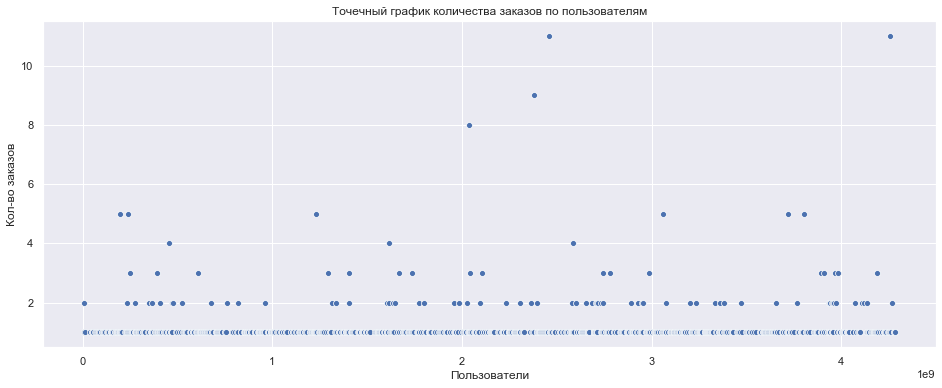

In [32]:
plt.figure(figsize=(16,6))
orders_per_user = orders.groupby('visitorId', as_index=False).agg({'transactionId': 'nunique'})
sns.scatterplot(
    data=orders_per_user, x="visitorId", y="transactionId",
    sizes=(20, 200), hue_norm=(0, 7), legend="full"
)
plt.title('Точечный график количества заказов по пользователям')
plt.xlabel('Пользователи')
plt.ylabel('Кол-во заказов')
plt.show()

> Как видно из графика выше большая часть заказов равна 1,однако мы имеем выбросы, когда люди совершали  6-10 заказов. Как раз эти выбросы и исказили наши данные по среднему чеку и конверсии.

In [33]:
ordersPerUser = orders.groupby(['visitorId'], as_index=False).agg({'transactionId': 'nunique','group':'max'})
ordersPerUser[ordersPerUser['transactionId']> 6]

,visitorId,transactionId,group
487,2038680547,8,B
569,2378935119,9,B
591,2458001652,11,B
1023,4256040402,11,B


> Как можно заметить большая часть выбросов принадлежит группе B

In [34]:
print('95-й и 99-й перцентили количества заказов на пользователя:',np.percentile(orders_per_user['transactionId'], [95, 99]))

95-й и 99-й перцентили количества заказов на пользователя: [2. 4.]


> Полученные данные о перцентилях дает нам понимание, что 95% процентов пользователей совершает 2 и менее покупки и то, что больше мы можем считать выбросами.

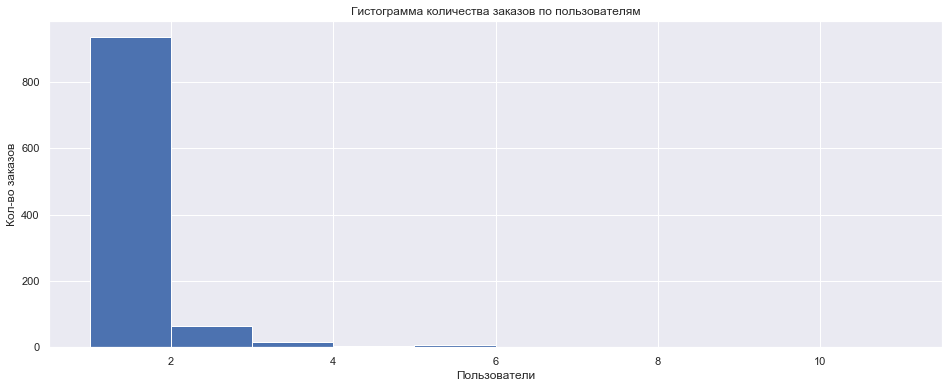

In [35]:
plt.figure(figsize=(16,6))
plt.hist(orders_per_user["transactionId"])
plt.title('Гистограмма количества заказов по пользователям')
plt.xlabel('Пользователи')
plt.ylabel('Кол-во заказов')
plt.show()

Этот график наглядно показывает, что большая часть распологается в пределах 1-2 заказа.

### Постройте точечный график стоимостей заказов. Сделайте выводы и предположения.

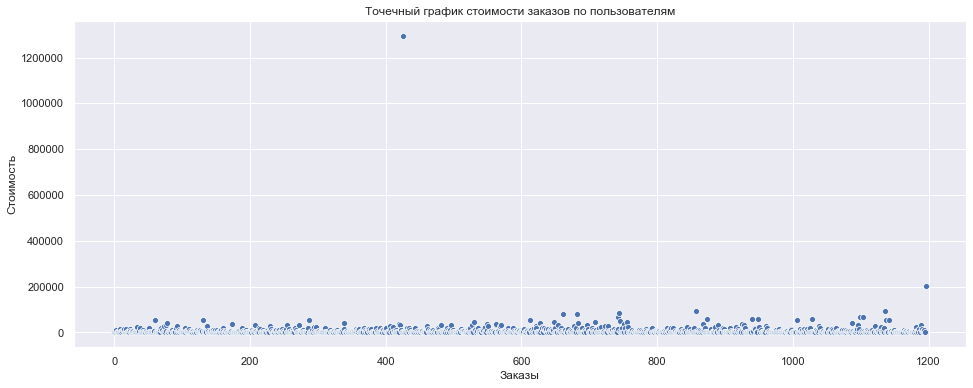

In [36]:
plt.figure(figsize=(16,6))
sns.scatterplot(
    data=orders["revenue"]
)
plt.title('Точечный график стоимости заказов по пользователям')
plt.ylabel('Стоимость')
plt.xlabel('Заказы')
plt.show()

> На данном графике мы видим, что кто-то из пользователей совершил покупку в 1.2млн,  что является выбросом.

In [37]:
orders[orders["revenue"] > 1200000]

,transactionId,visitorId,date,revenue,group
425,590470918,1920142716,2019-08-19,1294500,B


Это покупатель группы B, значительно исказил наши данные выше.

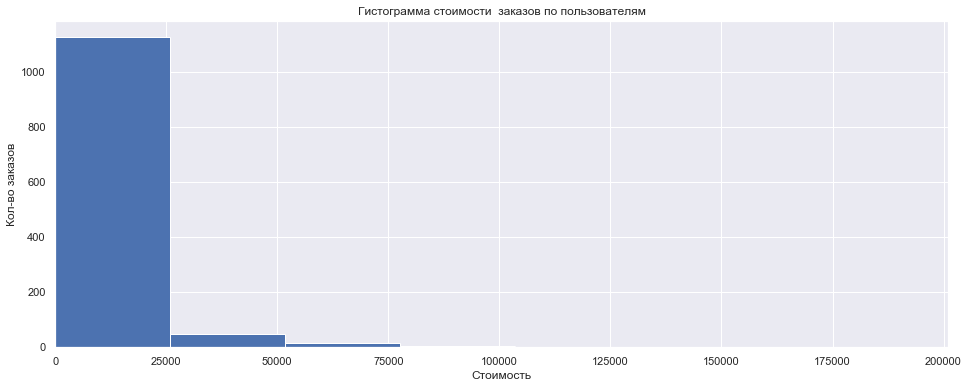

In [38]:
plt.figure(figsize=(16,6))
plt.hist(orders["revenue"],bins =50)
plt.title('Гистограмма стоимости  заказов по пользователям')
plt.xlabel('Стоимость')
plt.ylabel('Кол-во заказов')
plt.xlim(0,201000)
plt.show()

> Как мы видим большая часть покупателей совершают покупки в пределах 25 тыс

In [39]:
print('95-й и 99-й перцентили количества заказов на пользователя:',np.percentile(orders["revenue"], [95, 99]))

95-й и 99-й перцентили количества заказов на пользователя: [28000.  58233.2]


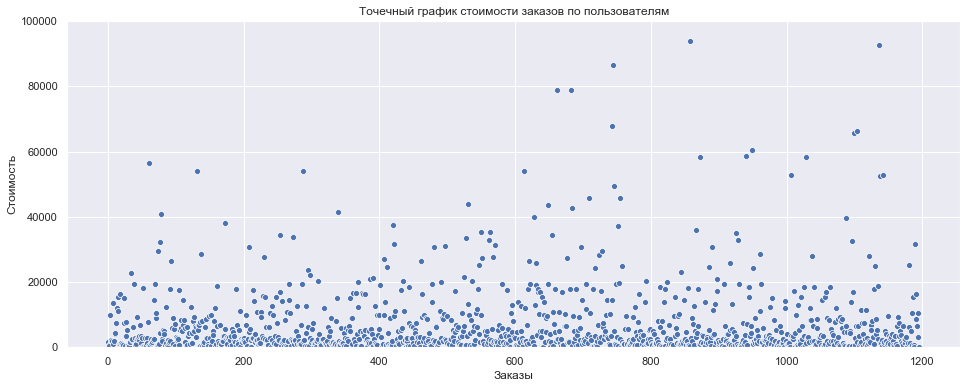

In [40]:
plt.figure(figsize=(16,6))
sns.scatterplot(
    data=orders["revenue"]
)
plt.title('Точечный график стоимости заказов по пользователям')
plt.ylabel('Стоимость')
plt.xlabel('Заказы')
plt.ylim([0, 100000])
plt.show()

> Рассмотрев график ближе мы такжке можем заметить выбросы.Покупатели с чеком в 100тыс 

> Будем считать границу аномальных заказов равную 95 перцентилю, то есть те кто совершил покупки свыше 28000

### Посчитайте статистическую значимость различий в конверсии между группами по «сырым» данным. Сделайте выводы и предположения.

Выдиляем кол-во покупок по пользователям в зависимости от группы

In [41]:
ordersByUsersA = (
    orders[orders['group'] == 'A']
    .groupby('visitorId', as_index=False)
    .agg({'transactionId': pd.Series.nunique})
)
ordersByUsersA.columns = ['userId', 'orders']

ordersByUsersB = (
    orders[orders['group'] == 'B']
    .groupby('visitorId', as_index=False)
    .agg({'transactionId': pd.Series.nunique})
)
ordersByUsersB.columns = ['userId', 'orders'] 

Для правильного расчета стат. значимости, в выборки добавим нулевые значения для тех, кто ничего не заказывал.

In [42]:
sampleA = pd.concat([ordersByUsersA['orders'],
                     pd.Series(0, index=np.arange(visitors.query('group == "A"')['visitors']
                    .sum() - len(ordersByUsersA['orders'])),
                     name='orders')],axis=0)

sampleB = pd.concat([ordersByUsersB['orders'],
                     pd.Series(0, index=np.arange(visitors.query('group == "B"')['visitors']
                    .sum() - len(ordersByUsersB['orders']))
                    , name='orders')],axis=0)

Создадтим функцию `shapiro` для критерия Шапиро-Уилка для проверки на нормальность

In [43]:
def shapiro(sample):
    
    alpha = 0.05
    results = st.shapiro(sample)
    print('pvalue: ', results[1])

    if results[1] < alpha:
        print('Отвергаем нулевую гипотезу: распределение не нормально')
    else:
        print('Не получилось отвергнуть нулевую гипотезу, всё нормально') 

Создадим функцию `mantest` для расчета критерия Манна-Уитни и расчета относительной разности

In [44]:
def mantest(old,new):
    alpha = 0.05  
    print('Тест Манна-Уитни')
    results = st.mannwhitneyu(old, new,alternative = 'two-sided')

    print('p-значение:{0:.3f} '.format(results.pvalue))

    if results[1] < alpha:
        print('Отвергаем нулевую гипотезу: разница статистически значима')
    else:
        print(
        'Не получилось отвергнуть нулевую гипотезу, вывод о различии сделать нельзя'
           ) 
    print('-'*50)
    print("Относительная разница: {0:.3f}".format(new.mean() / old.mean() - 1)) 


Проверим выборки на нормальность. Сформулируем гипотезы:

H0: Конверсия по сырым данным имеет нормальное распределение

H1: Распределение конверсии по сырым данным не нормально

In [45]:
shapiro(sampleA)
shapiro(sampleB)

pvalue:  0.0
Отвергаем нулевую гипотезу: распределение не нормально
pvalue:  0.0
Отвергаем нулевую гипотезу: распределение не нормально


Распределение не нормально, расчитаем статистическую значимость различий тестом Уилкоксона-Манна-Уитни. Сформулируем гипотезы:

H0: По сырым данным, конверсии в группах не имеют статистически значимых различий

H1: По сырым данным, между конверсиями групп присутствуют статистически значимые различия

In [46]:
mantest(sampleA,sampleB)

Тест Манна-Уитни
p-значение:0.017 
Отвергаем нулевую гипотезу: разница статистически значима
--------------------------------------------------
Относительная разница: 0.138


### Посчитайте статистическую значимость различий в среднем чеке заказа между группами по «сырым» данным. Сделайте выводы и предположения

In [47]:
sampA = orders[orders['group']=='A']['revenue']
sampB = orders[orders['group']=='B']['revenue']

Проверим выборки на нормальность:

H0: Средний чек по сырым данным имеет нормальное распределение
H1: Распределение среднего чека по сырым данным не нормально

In [48]:
shapiro(sampA)
shapiro(sampB)

pvalue:  1.739703399801917e-34
Отвергаем нулевую гипотезу: распределение не нормально
pvalue:  0.0
Отвергаем нулевую гипотезу: распределение не нормально


Гипотезы о нормальном распределение отвергли. Проведем тест Уилкоксона-Манна-Уитни. Сформулируем гипотезы:

H0: Средние чеки групп по сырым данным не имеют статистически значимых различий
H1: Присутствуют статистически значимые различия между средними чеками групп по сырым данным

In [49]:
mantest(sampA,sampB)

Тест Манна-Уитни
p-значение:0.729 
Не получилось отвергнуть нулевую гипотезу, вывод о различии сделать нельзя
--------------------------------------------------
Относительная разница: 0.259


### Посчитайте статистическую значимость различий в конверсии между группами по «очищенным» данным. Сделайте выводы и предположения

Отберем кол-во нерелевантных пользователей

In [50]:
badOrderUsers = (orders
                   .groupby('visitorId', as_index=False)
                   .agg({'transactionId': 'nunique'})
                   .query('transactionId > 2')['visitorId']
                  )
badCheckUsers = orders.query('revenue > 28000')['visitorId']
badUsers = pd.concat([badOrderUsers, badCheckUsers]).drop_duplicates()
print('Количество нерелевантных клиентов:', len(badUsers))

Количество нерелевантных клиентов: 83


В каждой из групп исключим нерелевантных пользователей

In [51]:
filteredOrdersA = ordersByUsersA[np.logical_not(ordersByUsersA['userId'].isin(badUsers))]
filteredSampleA = pd.concat([filteredOrdersA['orders'], 
                             pd.Series(0, index=np.arange(visitors.query('group == "A"')['visitors']
                             .sum() - len(ordersByUsersA['orders'])), 
                             name='orders')],axis=0)

In [52]:
filteredOrdersB = ordersByUsersB[np.logical_not(ordersByUsersB['userId'].isin(badUsers))]
filteredSampleB = pd.concat([filteredOrdersB['orders'],
                             pd.Series(0, index=np.arange(visitors.query('group == "A"')['visitors']
                             .sum() - len(ordersByUsersB['orders'])),
                              name='orders')],axis=0)

Проверим выборки на нормальность.

H0: Конверсия по очищенным данным имеет нормальное распределение
H1: Распределение конверсии по очищенным данным не нормально

In [53]:
shapiro(filteredSampleA)
shapiro(filteredSampleB)

pvalue:  0.0
Отвергаем нулевую гипотезу: распределение не нормально
pvalue:  0.0
Отвергаем нулевую гипотезу: распределение не нормально


Выборки не нормальны. Проведем тест Уилкоксона-Манна-Уитни. Сформулируем гипотезы:

H0: По очищенным данным, конверсии групп не имеют статистически значимых различий
H1: Присутствуют статистически значимые различия между конверсиями групп по очищенным данным

In [54]:
mantest(filteredSampleA ,filteredSampleB)

Тест Манна-Уитни
p-значение:0.008 
Отвергаем нулевую гипотезу: разница статистически значима
--------------------------------------------------
Относительная разница: 0.187


### Посчитайте статистическую значимость различий в среднем чеке заказа между группами по «очищенным» данным. Сделайте выводы и предположения.

Отфильруем нерелевантных пользователей, чтобы сделать вывод о стат. значимости в среднем чеке

In [55]:
filtredSampA = orders[(orders['group'] == "A") & (np.logical_not(orders['visitorId'].isin(badUsers)))]['revenue']

filtredSampB = orders[(orders['group'] == "B") & (np.logical_not(orders['visitorId'].isin(badUsers)))]['revenue']

Проверим на нормальность

H0: Средний чек по очищенным данным имеет нормальное распределение
H1: Распределение среднего чека по очищенным данным не нормально

In [56]:
shapiro(filtredSampA)
shapiro(filtredSampB)

pvalue:  9.829744882191168e-24
Отвергаем нулевую гипотезу: распределение не нормально
pvalue:  3.233262361030969e-27
Отвергаем нулевую гипотезу: распределение не нормально


Распределение не является нормальным. Расчитаем статистическую значимость различий тестом Уилкоксона-Манна-Уитни. Сформулируем гипотезы:

H0: Средние чеки групп, по очищенным данным, не имеют статистически значимых различий
H1: По очищенным данным, между средними чеками групп присутствуют статистически значимые различия

In [57]:
mantest(filtredSampA,filtredSampB)

Тест Манна-Уитни
p-значение:0.753 
Не получилось отвергнуть нулевую гипотезу, вывод о различии сделать нельзя
--------------------------------------------------
Относительная разница: -0.022


По "сырым" данным сегмент B вел по среднему чеку на 26%, а теперь он проигрывает на 2%. Аномальные заказы сильно влияют на результаты теста

### Вывод:
При приотизации гипотез делаем больше ставку на метод RICE, так как он еще учитывает скольких пользователей затронит измениение. 
В лидеры вышли: Добавить форму подписки на все основные страницы,Добавить блоки рекомендаций товаров на сайт,Добавить два новых канала привлечения трафика. 

По графикам кумулятивной выручки и среднего чека в лидеры вышла группа B,но на этом этапе нас смущали выбросы.По графикам кумулятивной конверсии тенденция сохранялась. В целом тенденция у обоих групп одинакова,но аномалии в данных могли исказить данные.

Построили отдельно графики, чтобы изучить выбросы и как в целом распределены данные. Допольнительно расчитали по метрикам 95 и 99 перцентиль. Основные занчительные выбросы принадлежали группе B.

Далее проведя статистические тесты Манна-Уитни мы заметили. Что По сырым данным, между конверсиями групп присутствуют статистически значимые различия.А также присутствуют статистически значимые различия между конверсиями групп по очищенным данным. Но благодаря очистке данных от выбросов мы получили более ясную картину в разнице конверсий: прирост в группе В на 18%

При рассмотрении статистических различий в среднем чек мы выяслнили, что yе получилось отвергнуть нулевую гипотезу, вывод о различии сделать нельзя. Для очищенных данных такая же картина. Но мы более чистую картину в относительной разнице: - 0.022, вмесето 0.225.

### Резюме:
Прeдлагается остановить тест и зафиксировать прирост конверсии на 18% в группе В. Нововая фича  значительно увеличило конверсию, но не повлияло на средний чек.


